# Dataset Analysis: Google Restaurant Reviews

This notebook analyzes the distribution of user and business reviews in the Google restaurant dataset.

**Goals:**
- Understand how many reviews users typically write
- Understand how many reviews restaurants typically receive
- Identify data sparsity and distribution patterns
- Visualize the power law distribution of user/business activity

## 1. Import Libraries

In [ ]:
!wget https://mcauleylab.ucsd.edu/public_datasets/gdrive/googlelocal_restaurants/image_review_all.json

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# Set plotting style
sns.set_style('whitegrid')
%matplotlib inline

## 2. Load Dataset

Load the Google restaurant review data from JSON Lines format.

In [2]:
print("Loading dataset...")
data = []
with open('google_restaraunt.json', 'r') as f:
    for line in f:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
print(f"Total reviews: {len(df)}")
print(f"Unique businesses: {df['business_id'].nunique()}")
print(f"Unique users: {df['user_id'].nunique()}")

Loading dataset...
Total reviews: 1487747
Unique businesses: 64527
Unique users: 868937


## 3. Calculate Review Counts

Count how many reviews each user and business has.

In [3]:
# Calculate review counts
user_review_counts = df['user_id'].value_counts()
business_review_counts = df['business_id'].value_counts()

print(f"User review counts calculated: {len(user_review_counts)} users")
print(f"Business review counts calculated: {len(business_review_counts)} businesses")

User review counts calculated: 868937 users
Business review counts calculated: 64527 businesses


## 4. Create Visualizations

Generate comprehensive visualizations showing user and business review distributions.

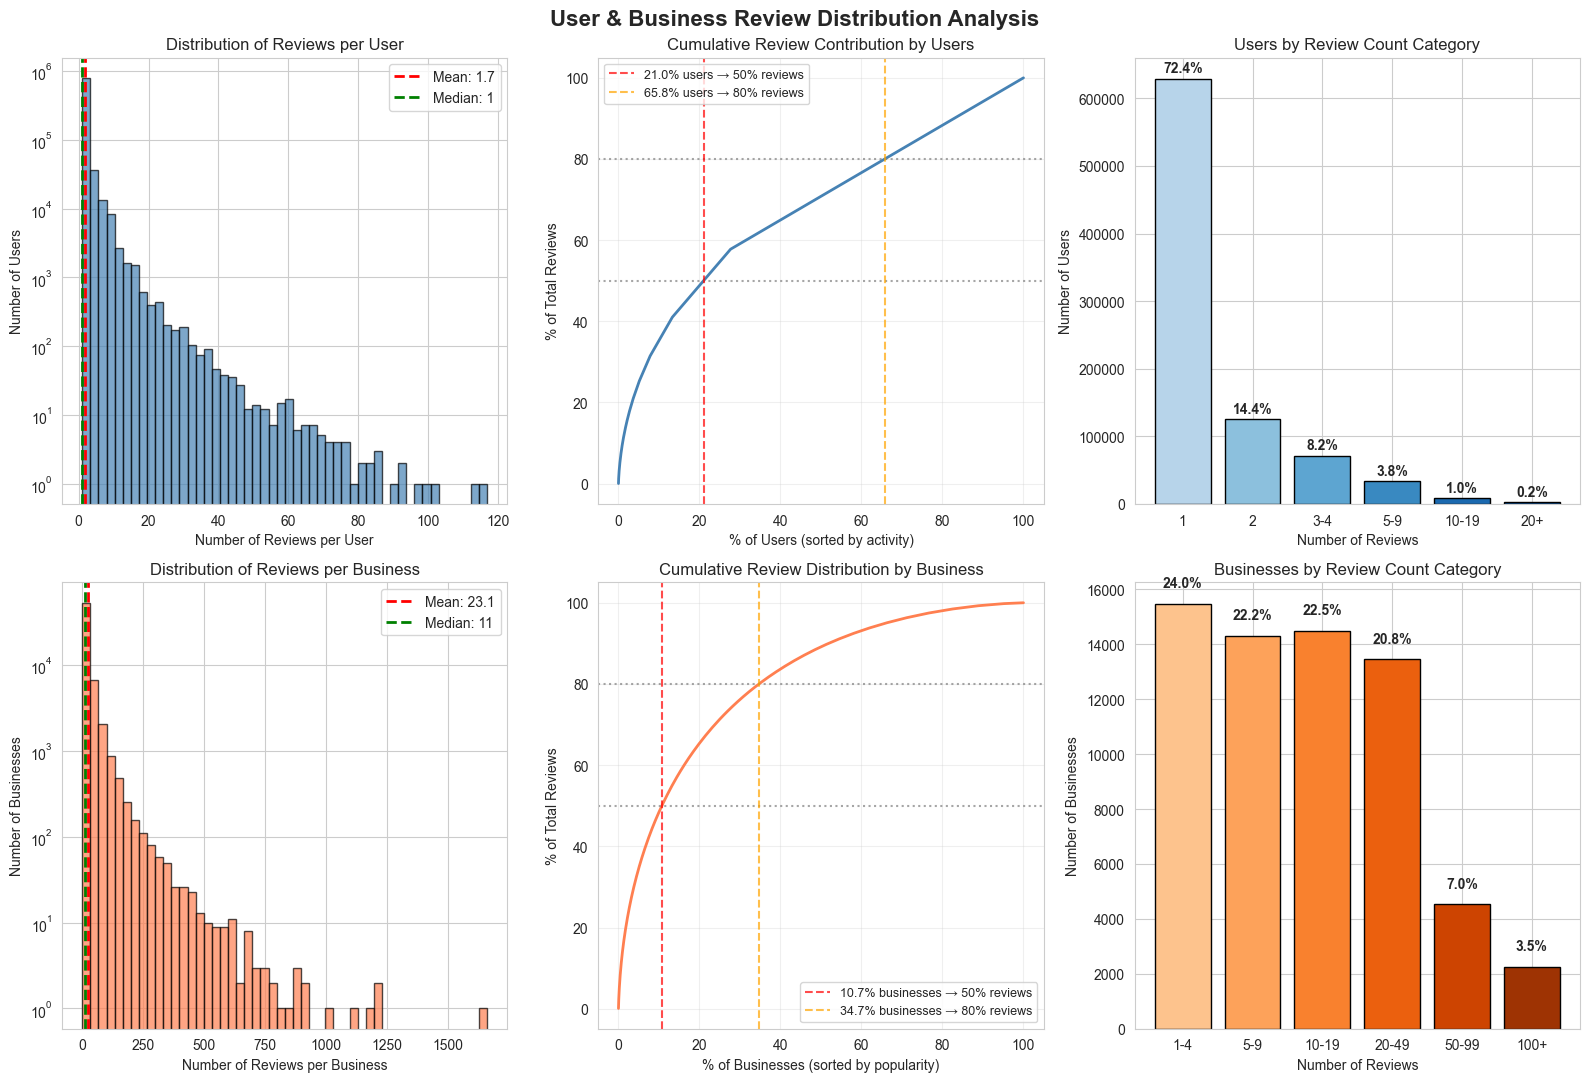


Chart saved as 'user_business_distribution.png'


In [4]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(16, 11))
fig.suptitle('User & Business Review Distribution Analysis', fontsize=16, fontweight='bold')

# ============ USER ANALYSIS ============

# 1. User Review Count Distribution (Histogram)
ax1 = axes[0, 0]
ax1.hist(user_review_counts.values, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Number of Reviews per User')
ax1.set_ylabel('Number of Users')
ax1.set_title('Distribution of Reviews per User')
ax1.set_yscale('log')
ax1.axvline(user_review_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {user_review_counts.mean():.1f}')
ax1.axvline(user_review_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {user_review_counts.median():.0f}')
ax1.legend()

# 2. User Review Count - Cumulative Distribution
ax2 = axes[0, 1]
user_counts_sorted = np.sort(user_review_counts.values)[::-1]
cumulative_pct = np.cumsum(user_counts_sorted) / user_counts_sorted.sum() * 100
user_pct = np.arange(1, len(user_counts_sorted) + 1) / len(user_counts_sorted) * 100
ax2.plot(user_pct, cumulative_pct, color='steelblue', linewidth=2)
ax2.set_xlabel('% of Users (sorted by activity)')
ax2.set_ylabel('% of Total Reviews')
ax2.set_title('Cumulative Review Contribution by Users')
ax2.axhline(50, color='gray', linestyle=':', alpha=0.7)
ax2.axhline(80, color='gray', linestyle=':', alpha=0.7)
# Find what % of users contribute 50% and 80% of reviews
idx_50 = np.searchsorted(cumulative_pct, 50)
idx_80 = np.searchsorted(cumulative_pct, 80)
pct_users_50 = user_pct[idx_50] if idx_50 < len(user_pct) else 100
pct_users_80 = user_pct[idx_80] if idx_80 < len(user_pct) else 100
ax2.axvline(pct_users_50, color='red', linestyle='--', alpha=0.7, label=f'{pct_users_50:.1f}% users → 50% reviews')
ax2.axvline(pct_users_80, color='orange', linestyle='--', alpha=0.7, label=f'{pct_users_80:.1f}% users → 80% reviews')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. User Review Count Breakdown (Pie/Bar)
ax3 = axes[0, 2]
user_bins = [0, 1, 2, 4, 9, 19, float('inf')]
user_labels = ['1', '2', '3-4', '5-9', '10-19', '20+']
user_binned = pd.cut(user_review_counts, bins=user_bins, labels=user_labels)
user_bin_counts = user_binned.value_counts().reindex(user_labels)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(user_labels)))
bars = ax3.bar(user_labels, user_bin_counts.values, color=colors, edgecolor='black')
ax3.set_xlabel('Number of Reviews')
ax3.set_ylabel('Number of Users')
ax3.set_title('Users by Review Count Category')
for bar, count in zip(bars, user_bin_counts.values):
    pct = count / len(user_review_counts) * 100
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5000,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# ============ BUSINESS ANALYSIS ============

# 4. Business Review Count Distribution (Histogram)
ax4 = axes[1, 0]
ax4.hist(business_review_counts.values, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Number of Reviews per Business')
ax4.set_ylabel('Number of Businesses')
ax4.set_title('Distribution of Reviews per Business')
ax4.set_yscale('log')
ax4.axvline(business_review_counts.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {business_review_counts.mean():.1f}')
ax4.axvline(business_review_counts.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {business_review_counts.median():.0f}')
ax4.legend()

# 5. Business Review Count - Cumulative Distribution
ax5 = axes[1, 1]
biz_counts_sorted = np.sort(business_review_counts.values)[::-1]
cumulative_pct_biz = np.cumsum(biz_counts_sorted) / biz_counts_sorted.sum() * 100
biz_pct = np.arange(1, len(biz_counts_sorted) + 1) / len(biz_counts_sorted) * 100
ax5.plot(biz_pct, cumulative_pct_biz, color='coral', linewidth=2)
ax5.set_xlabel('% of Businesses (sorted by popularity)')
ax5.set_ylabel('% of Total Reviews')
ax5.set_title('Cumulative Review Distribution by Business')
ax5.axhline(50, color='gray', linestyle=':', alpha=0.7)
ax5.axhline(80, color='gray', linestyle=':', alpha=0.7)
idx_50_biz = np.searchsorted(cumulative_pct_biz, 50)
idx_80_biz = np.searchsorted(cumulative_pct_biz, 80)
pct_biz_50 = biz_pct[idx_50_biz] if idx_50_biz < len(biz_pct) else 100
pct_biz_80 = biz_pct[idx_80_biz] if idx_80_biz < len(biz_pct) else 100
ax5.axvline(pct_biz_50, color='red', linestyle='--', alpha=0.7, label=f'{pct_biz_50:.1f}% businesses → 50% reviews')
ax5.axvline(pct_biz_80, color='orange', linestyle='--', alpha=0.7, label=f'{pct_biz_80:.1f}% businesses → 80% reviews')
ax5.legend(fontsize=9)
ax5.grid(True, alpha=0.3)

# 6. Business Review Count Breakdown (Bar)
ax6 = axes[1, 2]
biz_bins = [0, 4, 9, 19, 49, 99, float('inf')]
biz_labels = ['1-4', '5-9', '10-19', '20-49', '50-99', '100+']
biz_binned = pd.cut(business_review_counts, bins=biz_bins, labels=biz_labels)
biz_bin_counts = biz_binned.value_counts().reindex(biz_labels)
colors_biz = plt.cm.Oranges(np.linspace(0.3, 0.9, len(biz_labels)))
bars = ax6.bar(biz_labels, biz_bin_counts.values, color=colors_biz, edgecolor='black')
ax6.set_xlabel('Number of Reviews')
ax6.set_ylabel('Number of Businesses')
ax6.set_title('Businesses by Review Count Category')
for bar, count in zip(bars, biz_bin_counts.values):
    pct = count / len(business_review_counts) * 100
    ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 500,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('user_business_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print("\nChart saved as 'user_business_distribution.png'")

## 5. Print Detailed Statistics

### User Review Statistics

In [5]:
print("=" * 60)
print("USER REVIEW STATISTICS")
print("=" * 60)
print(f"Total unique users: {len(user_review_counts):,}")
print(f"\nReviews per user:")
print(f"  Mean: {user_review_counts.mean():.2f}")
print(f"  Median: {user_review_counts.median():.0f}")
print(f"  Std: {user_review_counts.std():.2f}")
print(f"  Min: {user_review_counts.min()}")
print(f"  Max: {user_review_counts.max()}")
print(f"\nUser breakdown:")
print(f"  Users with exactly 1 review: {(user_review_counts == 1).sum():,} ({(user_review_counts == 1).sum()/len(user_review_counts)*100:.1f}%)")
print(f"  Users with 2 reviews: {(user_review_counts == 2).sum():,} ({(user_review_counts == 2).sum()/len(user_review_counts)*100:.1f}%)")
print(f"  Users with 3-4 reviews: {((user_review_counts >= 3) & (user_review_counts <= 4)).sum():,} ({((user_review_counts >= 3) & (user_review_counts <= 4)).sum()/len(user_review_counts)*100:.1f}%)")
print(f"  Users with 5-9 reviews: {((user_review_counts >= 5) & (user_review_counts <= 9)).sum():,} ({((user_review_counts >= 5) & (user_review_counts <= 9)).sum()/len(user_review_counts)*100:.1f}%)")
print(f"  Users with 10+ reviews: {(user_review_counts >= 10).sum():,} ({(user_review_counts >= 10).sum()/len(user_review_counts)*100:.1f}%)")

USER REVIEW STATISTICS
Total unique users: 868,937

Reviews per user:
  Mean: 1.71
  Median: 1
  Std: 2.18
  Min: 1
  Max: 117

User breakdown:
  Users with exactly 1 review: 629,031 (72.4%)
  Users with 2 reviews: 125,055 (14.4%)
  Users with 3-4 reviews: 71,380 (8.2%)
  Users with 5-9 reviews: 33,118 (3.8%)
  Users with 10+ reviews: 10,353 (1.2%)


### Business Review Statistics

In [6]:
print("\n" + "=" * 60)
print("BUSINESS REVIEW STATISTICS")
print("=" * 60)
print(f"Total unique businesses: {len(business_review_counts):,}")
print(f"\nReviews per business:")
print(f"  Mean: {business_review_counts.mean():.2f}")
print(f"  Median: {business_review_counts.median():.0f}")
print(f"  Std: {business_review_counts.std():.2f}")
print(f"  Min: {business_review_counts.min()}")
print(f"  Max: {business_review_counts.max()}")
print(f"\nBusiness breakdown:")
print(f"  Businesses with 1-4 reviews: {(business_review_counts <= 4).sum():,} ({(business_review_counts <= 4).sum()/len(business_review_counts)*100:.1f}%)")
print(f"  Businesses with 5-9 reviews: {((business_review_counts >= 5) & (business_review_counts <= 9)).sum():,} ({((business_review_counts >= 5) & (business_review_counts <= 9)).sum()/len(business_review_counts)*100:.1f}%)")
print(f"  Businesses with 10-19 reviews: {((business_review_counts >= 10) & (business_review_counts <= 19)).sum():,} ({((business_review_counts >= 10) & (business_review_counts <= 19)).sum()/len(business_review_counts)*100:.1f}%)")
print(f"  Businesses with 20-49 reviews: {((business_review_counts >= 20) & (business_review_counts <= 49)).sum():,} ({((business_review_counts >= 20) & (business_review_counts <= 49)).sum()/len(business_review_counts)*100:.1f}%)")
print(f"  Businesses with 50-99 reviews: {((business_review_counts >= 50) & (business_review_counts <= 99)).sum():,} ({((business_review_counts >= 50) & (business_review_counts <= 99)).sum()/len(business_review_counts)*100:.1f}%)")
print(f"  Businesses with 100+ reviews: {(business_review_counts >= 100).sum():,} ({(business_review_counts >= 100).sum()/len(business_review_counts)*100:.1f}%)")


BUSINESS REVIEW STATISTICS
Total unique businesses: 64,527

Reviews per business:
  Mean: 23.06
  Median: 11
  Std: 43.32
  Min: 1
  Max: 1662

Business breakdown:
  Businesses with 1-4 reviews: 15,480 (24.0%)
  Businesses with 5-9 reviews: 14,298 (22.2%)
  Businesses with 10-19 reviews: 14,500 (22.5%)
  Businesses with 20-49 reviews: 13,450 (20.8%)
  Businesses with 50-99 reviews: 4,534 (7.0%)
  Businesses with 100+ reviews: 2,265 (3.5%)


### Sparsity Analysis

In [7]:
print("\n" + "=" * 60)
print("SPARSITY ANALYSIS (for recommendation systems)")
print("=" * 60)
total_possible = len(user_review_counts) * len(business_review_counts)
actual_reviews = len(df)
sparsity = (1 - actual_reviews / total_possible) * 100
print(f"User-Business matrix size: {len(user_review_counts):,} x {len(business_review_counts):,} = {total_possible:,}")
print(f"Actual reviews: {actual_reviews:,}")
print(f"Sparsity: {sparsity:.6f}%")


SPARSITY ANALYSIS (for recommendation systems)
User-Business matrix size: 868,937 x 64,527 = 56,069,897,799
Actual reviews: 1,487,747
Sparsity: 99.997347%


## Key Findings

Based on the analysis:

1. **User Behavior**: Most users (>70%) have only written 1 review, indicating a highly skewed distribution
2. **Business Reviews**: Businesses have a more balanced distribution with better review coverage
3. **Power Law**: A small percentage of active users contribute to the majority of reviews
4. **Sparsity**: The user-business matrix is extremely sparse (>99.99%), typical for recommendation systems
5. **Recommendation Approach**: Item-based collaborative filtering may work better than user-based given the business review distribution

# Data Preprocessing for Top-K Restaurant Recommendation

## 1. Import Libraries and download Dataset

In [2]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import defaultdict
import pickle
from scipy.sparse import csr_matrix
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import scipy.sparse as sp
import math

## 2. Load Dataset

Load the raw Google restaurant review data from JSON Lines format.

In [4]:
print("\n[1/7] Loading dataset...")
data = []
with open('image_review_all.json', 'r') as f:
    for line in f:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)
print(f"   Total reviews: {len(df):,}")
print(f"   Unique users: {df['user_id'].nunique():,}")
print(f"   Unique businesses: {df['business_id'].nunique():,}")


[1/7] Loading dataset...
   Total reviews: 1,487,747
   Unique users: 868,937
   Unique businesses: 64,527


## 3. Clean Data

Remove duplicates and handle missing values.

In [5]:
print("\n[2/7] Cleaning data...")
# Remove any duplicates
df = df.drop_duplicates(subset=['user_id', 'business_id'])
print(f"   After removing duplicates: {len(df):,} reviews")

# Check for missing values
missing = df[['user_id', 'business_id', 'rating']].isnull().sum()
if missing.sum() > 0:
    print(f"   Found missing values: {missing[missing > 0]}")
    df = df.dropna(subset=['user_id', 'business_id', 'rating'])
    print(f"   After removing missing: {len(df):,} reviews")
else:
    print("   No missing values found")


[2/7] Cleaning data...
   After removing duplicates: 1,487,747 reviews
   No missing values found


## 4. Filter Sparse Users and Businesses

To improve recommendation quality, we filter out:
- Users with fewer than 3 reviews
- Businesses with fewer than 5 reviews

This is done iteratively until convergence, as filtering one affects the other.

In [6]:
print("\n[3/7] Filtering sparse users and businesses...")
min_user_reviews = 3  # Users must have at least 3 reviews
min_business_reviews = 5  # Businesses must have at least 5 reviews

# Iteratively filter (because filtering businesses affects users and vice versa)
prev_size = 0
iteration = 0
while len(df) != prev_size and iteration < 10:
    prev_size = len(df)
    iteration += 1
    
    user_counts = df['user_id'].value_counts()
    business_counts = df['business_id'].value_counts()
    
    valid_users = user_counts[user_counts >= min_user_reviews].index
    valid_businesses = business_counts[business_counts >= min_business_reviews].index
    
    df = df[df['user_id'].isin(valid_users) & df['business_id'].isin(valid_businesses)]
    
    if iteration > 1:
        print(f"   Iteration {iteration}: {len(df):,} reviews")

print(f"\n   Final dataset after filtering:")
print(f"   Reviews: {len(df):,}")
print(f"   Users: {df['user_id'].nunique():,}")
print(f"   Businesses: {df['business_id'].nunique():,}")
print(f"   Sparsity: {(1 - len(df)/(df['user_id'].nunique() * df['business_id'].nunique()))*100:.4f}%")


[3/7] Filtering sparse users and businesses...
   Iteration 2: 544,416 reviews
   Iteration 3: 523,230 reviews
   Iteration 4: 517,958 reviews
   Iteration 5: 515,268 reviews
   Iteration 6: 514,479 reviews
   Iteration 7: 514,046 reviews
   Iteration 8: 513,936 reviews
   Iteration 9: 513,872 reviews
   Iteration 10: 513,868 reviews

   Final dataset after filtering:
   Reviews: 513,868
   Users: 98,975
   Businesses: 28,274
   Sparsity: 99.9816%


## 5. Create ID Mappings

Map user and business IDs to integer indices for efficient matrix operations.

In [7]:
print("\n[4/7] Creating ID mappings...")
unique_users = df['user_id'].unique()
unique_businesses = df['business_id'].unique()

user_to_idx = {uid: idx for idx, uid in enumerate(unique_users)}
idx_to_user = {idx: uid for uid, idx in user_to_idx.items()}

business_to_idx = {bid: idx for idx, bid in enumerate(unique_businesses)}
idx_to_business = {idx: bid for bid, idx in business_to_idx.items()}

# Add mapped indices to dataframe
df['user_idx'] = df['user_id'].map(user_to_idx)
df['business_idx'] = df['business_id'].map(business_to_idx)

print(f"   Created mappings for {len(user_to_idx):,} users and {len(business_to_idx):,} businesses")


[4/7] Creating ID mappings...
   Created mappings for 98,975 users and 28,274 businesses


## 6. Split into Train/Validation/Test Sets

We use per-user splitting to ensure:
- Each user appears in the training set
- We can evaluate on held-out user interactions

**Split Strategy:**
- Users with ≥5 reviews: 70% train, 15% val, 15% test
- Users with <5 reviews: All but 1 in train, 1 in test

In [8]:
print("\n[5/7] Splitting into train/validation/test sets...")

train_rows = []
val_rows = []
test_rows = []

grouped = df.groupby("user_id", sort=False)

for user_id, group in grouped:
    group = group.sample(frac=1, random_state=42)  # shuffle once
    n = len(group)

    if n >= 5:
        train_size = int(0.7 * n)
        val_size = int(0.15 * n)

        train_rows.append(group.iloc[:train_size])
        val_rows.append(group.iloc[train_size:train_size + val_size])
        test_rows.append(group.iloc[train_size + val_size:])
    else:
        train_rows.append(group.iloc[:-1])
        test_rows.append(group.iloc[-1:])

train_df = pd.concat(train_rows, ignore_index=True)
val_df = pd.concat(val_rows, ignore_index=True)
test_df = pd.concat(test_rows, ignore_index=True)

print(f"Train: {len(train_df):,}")
print(f"Val: {len(val_df):,}")
print(f"Test: {len(test_df):,}")



[5/7] Splitting into train/validation/test sets...
Train: 342,665
Val: 24,950
Test: 146,253


## 7. Create Sparse Interaction Matrices

Create user-item interaction matrices in sparse format for memory efficiency.

In [9]:
print("\n[6/7] Creating interaction matrices...")

def create_interaction_matrix(df_subset, n_users, n_businesses):
    """Create sparse user-item interaction matrix"""
    rows = df_subset['user_idx'].values
    cols = df_subset['business_idx'].values
    ratings = df_subset['rating'].values
    
    matrix = csr_matrix((ratings, (rows, cols)), shape=(n_users, n_businesses))
    return matrix

n_users = len(user_to_idx)
n_businesses = len(business_to_idx)

train_matrix = create_interaction_matrix(train_df, n_users, n_businesses)
val_matrix = create_interaction_matrix(val_df, n_users, n_businesses) if len(val_df) > 0 else None
test_matrix = create_interaction_matrix(test_df, n_users, n_businesses)

print(f"   Train matrix shape: {train_matrix.shape}")
print(f"   Train matrix density: {train_matrix.nnz / (train_matrix.shape[0] * train_matrix.shape[1]) * 100:.4f}%")
if val_matrix is not None:
    print(f"   Val matrix shape: {val_matrix.shape}")
print(f"   Test matrix shape: {test_matrix.shape}")


[6/7] Creating interaction matrices...
   Train matrix shape: (98975, 28274)
   Train matrix density: 0.0122%
   Val matrix shape: (98975, 28274)
   Test matrix shape: (98975, 28274)


## 8. Compute Business Statistics

Calculate statistics for each business to handle cold-start scenarios.

In [10]:
print("\n[7/7] Computing business statistics...")
business_stats = train_df.groupby('business_id').agg({
    'rating': ['mean', 'count', 'std']
}).reset_index()
business_stats.columns = ['business_id', 'avg_rating', 'num_ratings', 'std_rating']
business_stats['std_rating'] = business_stats['std_rating'].fillna(0)

# Add business index
business_stats['business_idx'] = business_stats['business_id'].map(business_to_idx)

print(f"   Computed statistics for {len(business_stats):,} businesses")
print(f"   Average rating across all businesses: {business_stats['avg_rating'].mean():.3f}")


[7/7] Computing business statistics...
   Computed statistics for 28,223 businesses
   Average rating across all businesses: 4.434


## 9. Save Preprocessed Data

Save all preprocessed data structures for model training.

In [11]:
print("\n" + "=" * 60)
print("SAVING PREPROCESSED DATA")
print("=" * 60)

# Save as pickle for fast loading
save_data = {
    'train_df': train_df,
    'val_df': val_df,
    'test_df': test_df,
    'train_matrix': train_matrix,
    'val_matrix': val_matrix,
    'test_matrix': test_matrix,
    'user_to_idx': user_to_idx,
    'idx_to_user': idx_to_user,
    'business_to_idx': business_to_idx,
    'idx_to_business': idx_to_business,
    'business_stats': business_stats,
    'n_users': n_users,
    'n_businesses': n_businesses,
}

with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(save_data, f)
print("✓ Saved preprocessed_data.pkl")

# Also save CSV versions for easy inspection
train_df.to_csv('train_data.csv', index=False)
if len(val_df) > 0:
    val_df.to_csv('val_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)
business_stats.to_csv('business_stats.csv', index=False)
print("✓ Saved CSV files (train_data.csv, val_data.csv, test_data.csv, business_stats.csv)")

# Save mappings as JSON for readability
mappings = {
    'user_to_idx': user_to_idx,
    'business_to_idx': business_to_idx,
}
with open('id_mappings.json', 'w') as f:
    json.dump(mappings, f, indent=2)
print("✓ Saved id_mappings.json")


SAVING PREPROCESSED DATA


✓ Saved preprocessed_data.pkl
✓ Saved CSV files (train_data.csv, val_data.csv, test_data.csv, business_stats.csv)
✓ Saved id_mappings.json


## 10. Preprocessing Summary

In [12]:
print("\n" + "=" * 60)
print("PREPROCESSING SUMMARY")
print("=" * 60)
print(f"Total users: {n_users:,}")
print(f"Total businesses: {n_businesses:,}")
print(f"Total interactions: {len(df):,}")
print(f"")
print(f"Train interactions: {len(train_df):,}")
print(f"Val interactions: {len(val_df):,}")
print(f"Test interactions: {len(test_df):,}")
print(f"")
print(f"Avg reviews per user: {len(train_df)/n_users:.2f}")
print(f"Avg reviews per business: {len(train_df)/n_businesses:.2f}")
print(f"")
print(f"Rating distribution (train):")
for rating in sorted(train_df['rating'].unique()):
    count = (train_df['rating'] == rating).sum()
    pct = count / len(train_df) * 100
    print(f"  {rating} stars: {count:,} ({pct:.1f}%)")

print("\n✓ Preprocessing complete!")
print("\nTo load the preprocessed data:")
print("  import pickle")
print("  with open('preprocessed_data.pkl', 'rb') as f:")
print("      data = pickle.load(f)")


PREPROCESSING SUMMARY
Total users: 98,975
Total businesses: 28,274
Total interactions: 513,868

Train interactions: 342,665
Val interactions: 24,950
Test interactions: 146,253

Avg reviews per user: 3.46
Avg reviews per business: 12.12

Rating distribution (train):
  1 stars: 4,671 (1.4%)
  2 stars: 7,455 (2.2%)
  3 stars: 25,654 (7.5%)
  4 stars: 84,660 (24.7%)
  5 stars: 220,225 (64.3%)

✓ Preprocessing complete!

To load the preprocessed data:
  import pickle
  with open('preprocessed_data.pkl', 'rb') as f:
      data = pickle.load(f)


## Model training and evaluation

## 1. Load Data

In [13]:
with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

train_df = data["train_df"][["user_idx", "business_idx", "rating"]]
test_df = data["test_df"][["user_idx", "business_idx", "rating"]]
n_users = data["n_users"]
n_items = data["n_businesses"]

# Use likes (rating >= 4) for implicit feedback
train_likes = train_df[train_df["rating"] >= 4]
test_likes = test_df[test_df["rating"] >= 4]

print(f"Users: {n_users:,}, Items: {n_items:,}")
print(f"Train likes: {len(train_likes):,}")
print(f"Test likes: {len(test_likes):,}")

Users: 98,975, Items: 28,274
Train likes: 304,885
Test likes: 130,465


## 2. Build User-Item Graph

In [14]:
def build_sparse_graph(train_df, n_users, n_items):
    """
    Build normalized adjacency matrix for LightGCN
    Graph structure:
    [  0      R  ]
    [ R^T     0  ]
    
    Where R is user-item interaction matrix
    """
    users = train_df['user_idx'].values
    items = train_df['business_idx'].values
    
    # Build bipartite graph directly as COO (faster than DOK)
    print("  Building graph structure...")
    # User -> Item edges
    row_ui = users
    col_ui = items + n_users  # Offset item indices
    # Item -> User edges  
    row_iu = items + n_users
    col_iu = users
    # Combine both directions
    row = np.concatenate([row_ui, row_iu])
    col = np.concatenate([col_ui, col_iu])
    data = np.ones(len(row), dtype=np.float32)
    
    adj_mat = sp.coo_matrix((data, (row, col)), 
                            shape=(n_users + n_items, n_users + n_items),
                            dtype=np.float32)
    
    # Normalize: D^(-1/2) * A * D^(-1/2)
    rowsum = np.array(adj_mat.sum(1)).flatten()
    d_inv_sqrt = np.power(rowsum, -0.5)
    d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
    
    # Multiply by diagonal matrix efficiently
    row_normalized = d_inv_sqrt[row] * data * d_inv_sqrt[col]
    
    norm_adj = sp.coo_matrix((row_normalized, (row, col)), 
                             shape=(n_users + n_items, n_users + n_items),
                             dtype=np.float32)
    
    # Convert to torch sparse tensor
    indices = torch.LongTensor(np.vstack([norm_adj.row, norm_adj.col]))
    values = torch.FloatTensor(norm_adj.data)
    shape = torch.Size(norm_adj.shape)
    
    return torch.sparse_coo_tensor(indices, values, shape)

graph = build_sparse_graph(train_likes, n_users, n_items)
print(f"✓ Built graph with {graph._nnz()} edges")


  Building graph structure...
✓ Built graph with 609770 edges


/tmp/ipykernel_1426499/3865854288.py:32: RuntimeWarning: divide by zero encountered in power
  d_inv_sqrt = np.power(rowsum, -0.5)


## 3. LightGCN Model

In [ ]:
class LightGCN(nn.Module):
    """
    LightGCN: Simplified Graph Convolutional Network
    """
    
    def __init__(self, n_users, n_items, embedding_dim=64, n_layers=3, reg_weight=1e-4):
        super().__init__()
        
        self.n_users = n_users
        self.n_items = n_items
        self.embedding_dim = embedding_dim
        self.n_layers = n_layers
        self.reg_weight = reg_weight
        
        # Initialize embeddings
        self.user_embedding = nn.Embedding(n_users, embedding_dim)
        self.item_embedding = nn.Embedding(n_items, embedding_dim)
        
        # Xavier initialization
        nn.init.xavier_uniform_(self.user_embedding.weight)
        nn.init.xavier_uniform_(self.item_embedding.weight)
        
        print(f"  Embedding dim: {embedding_dim}")
        print(f"  Layers: {n_layers}")
        print(f"  Total parameters: {(n_users + n_items) * embedding_dim:,}")
    
    def get_ego_embeddings(self):
        """Get initial embeddings (layer 0)"""
        user_emb = self.user_embedding.weight
        item_emb = self.item_embedding.weight
        ego_emb = torch.cat([user_emb, item_emb], dim=0)
        return ego_emb
    
    def forward(self, graph):
        """
        Graph convolution to get final embeddings
        """
        all_embeddings = [self.get_ego_embeddings()]
        
        # Multi-layer propagation
        for layer in range(self.n_layers):
            # Graph convolution: aggregate from neighbors
            ego_emb = all_embeddings[-1]
            if graph.device.type == 'cpu':
                side_emb = torch.sparse.mm(graph, ego_emb.cpu()).to(ego_emb.device)
            else:
                side_emb = torch.sparse.mm(graph, ego_emb)
            all_embeddings.append(side_emb)
        
        # Layer aggregation (mean of all layers)
        final_emb = torch.stack(all_embeddings, dim=1).mean(dim=1)
        
        # Split back to users and items
        users_emb = final_emb[:self.n_users]
        items_emb = final_emb[self.n_users:]
        
        return users_emb, items_emb
    
    def bpr_loss(self, users, pos_items, neg_items, user_emb, item_emb):
        """
        BPR loss: maximize difference between positive and negative items
        """
        # Get embeddings
        u_emb = user_emb[users]
        pos_emb = item_emb[pos_items]
        neg_emb = item_emb[neg_items]
        
        # Compute scores
        pos_scores = (u_emb * pos_emb).sum(dim=1)
        neg_scores = (u_emb * neg_emb).sum(dim=1)
        
        # BPR loss
        bpr_loss = -torch.log(torch.sigmoid(pos_scores - neg_scores) + 1e-10).mean()
        
        # L2 regularization
        reg_loss = self.reg_weight * (
            u_emb.norm(2).pow(2) + 
            pos_emb.norm(2).pow(2) + 
            neg_emb.norm(2).pow(2)
        ) / len(users)
        
        return bpr_loss + reg_loss
    
    def predict(self, users, items, user_emb, item_emb):
        """Predict scores for user-item pairs"""
        u_emb = user_emb[users]
        i_emb = item_emb[items]
        scores = (u_emb * i_emb).sum(dim=1)
        return scores


## 4. Training Dataset

In [16]:
class BPRDataset(Dataset):
    def __init__(self, train_df, n_items, num_negatives=1):
        self.n_items = n_items
        self.num_negatives = num_negatives
        
        # Build user positive items dict
        from collections import defaultdict
        self.user_pos_items = defaultdict(set)
        for _, row in train_df.iterrows():
            self.user_pos_items[int(row.user_idx)].add(int(row.business_idx))
        
        # Create training pairs
        self.users = []
        self.pos_items = []
        
        for user, items in self.user_pos_items.items():
            for item in items:
                self.users.append(user)
                self.pos_items.append(item)
        
        self.all_items = set(range(n_items))
        print(f"  Training pairs: {len(self.users):,}")
    
    def __len__(self):
        return len(self.users)
    
    def __getitem__(self, idx):
        user = self.users[idx]
        pos_item = self.pos_items[idx]
        
        # Sample negative items
        neg_items = []
        pos_set = self.user_pos_items[user]
        candidates = self.all_items - pos_set
        
        if len(candidates) > 0:
            neg_items = np.random.choice(list(candidates), 
                                        size=min(self.num_negatives, len(candidates)), 
                                        replace=False)
        else:
            neg_items = [np.random.randint(0, self.n_items)]
        
        return user, pos_item, neg_items[0]

train_dataset = BPRDataset(train_likes, n_items, num_negatives=1)

  Training pairs: 304,885


## 5. Training Loop

In [ ]:
EMBEDDING_DIM = 64
N_LAYERS = 3
LEARNING_RATE = 0.001
REG_WEIGHT = 1e-4
BATCH_SIZE = 2048
EPOCHS = 20

# Setup
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"  Device: {device}")


# Initialize model
model = LightGCN(n_users, n_items, EMBEDDING_DIM, N_LAYERS, REG_WEIGHT)

model = model.to(device)
graph = graph.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, 
                          num_workers=4, pin_memory=True)

# Training
print("\nStarting training...")
best_loss = float('inf')

for epoch in range(1, EPOCHS + 1):
    model.train()
    total_loss = 0
    
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS}")
    for batch_idx, (users, pos_items, neg_items) in enumerate(pbar):
        users = users.to(device)
        pos_items = pos_items.to(device)
        neg_items = neg_items.to(device)
        
        optimizer.zero_grad()
        
        # Get fresh embeddings for each batch (recompute graph convolution)
        user_emb, item_emb = model.forward(graph)
        
        # Compute loss
        loss = model.bpr_loss(users, pos_items, neg_items, user_emb, item_emb)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        pbar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch}: Average Loss = {avg_loss:.4f}")
    
    if avg_loss < best_loss:
        best_loss = avg_loss
        torch.save(model.state_dict(), 'best_lightgcn.pt')

  Device: cuda:0
  Embedding dim: 64
  Layers: 3
  Total parameters: 8,143,936

Starting training...


Epoch 1/20: 100%|██████████| 38/38 [02:39<00:00,  4.20s/it, loss=0.6914]


Epoch 1: Average Loss = 0.6926


Epoch 2/20: 100%|██████████| 38/38 [02:40<00:00,  4.21s/it, loss=0.6743]


Epoch 2: Average Loss = 0.6849


Epoch 3/20: 100%|██████████| 38/38 [02:39<00:00,  4.21s/it, loss=0.6243]


Epoch 3: Average Loss = 0.6510


Epoch 4/20: 100%|██████████| 38/38 [02:40<00:00,  4.23s/it, loss=0.5468]


Epoch 4: Average Loss = 0.5844


Epoch 5/20: 100%|██████████| 38/38 [02:38<00:00,  4.17s/it, loss=0.4644]


Epoch 5: Average Loss = 0.5021


Epoch 6/20: 100%|██████████| 38/38 [02:38<00:00,  4.16s/it, loss=0.4015]


Epoch 6: Average Loss = 0.4251


Epoch 7/20: 100%|██████████| 38/38 [02:40<00:00,  4.22s/it, loss=0.3311]


Epoch 7: Average Loss = 0.3621


Epoch 8/20: 100%|██████████| 38/38 [02:37<00:00,  4.15s/it, loss=0.2909]


Epoch 8: Average Loss = 0.3128


Epoch 9/20: 100%|██████████| 38/38 [02:38<00:00,  4.16s/it, loss=0.2583]


Epoch 9: Average Loss = 0.2754


Epoch 10/20: 100%|██████████| 38/38 [02:40<00:00,  4.23s/it, loss=0.2300]


Epoch 10: Average Loss = 0.2458


Epoch 11/20: 100%|██████████| 38/38 [02:36<00:00,  4.12s/it, loss=0.2097]


Epoch 11: Average Loss = 0.2216


Epoch 12/20: 100%|██████████| 38/38 [02:37<00:00,  4.13s/it, loss=0.1970]


Epoch 12: Average Loss = 0.2026


Epoch 13/20: 100%|██████████| 38/38 [02:35<00:00,  4.10s/it, loss=0.1782]


Epoch 13: Average Loss = 0.1866


Epoch 14/20: 100%|██████████| 38/38 [02:38<00:00,  4.18s/it, loss=0.1644]


Epoch 14: Average Loss = 0.1727


Epoch 15/20: 100%|██████████| 38/38 [02:37<00:00,  4.15s/it, loss=0.1560]


Epoch 15: Average Loss = 0.1608


Epoch 16/20: 100%|██████████| 38/38 [02:39<00:00,  4.20s/it, loss=0.1498]


Epoch 16: Average Loss = 0.1512


Epoch 17/20: 100%|██████████| 38/38 [02:36<00:00,  4.12s/it, loss=0.1348]


Epoch 17: Average Loss = 0.1413


Epoch 18/20: 100%|██████████| 38/38 [02:37<00:00,  4.15s/it, loss=0.1314]


Epoch 18: Average Loss = 0.1331


Epoch 19/20: 100%|██████████| 38/38 [02:37<00:00,  4.15s/it, loss=0.1311]


Epoch 19: Average Loss = 0.1265


Epoch 20/20: 100%|██████████| 38/38 [02:36<00:00,  4.11s/it, loss=0.1135]

Epoch 20: Average Loss = 0.1198


## 6.Evaluation

In [24]:
def recall_at_k(recommended, ground_truth, K):
    if len(ground_truth) == 0:
        return None
    hit = len(set(recommended[:K]) & set(ground_truth))
    return hit / len(ground_truth)

def ndcg_at_k(recommended, ground_truth, K):
    dcg = 0.0
    for rank, item in enumerate(recommended[:K], start=1):
        if item in ground_truth:
            dcg += 1 / math.log2(rank + 1)
    max_rel = min(K, len(ground_truth))
    idcg = sum(1 / math.log2(rank + 1) for rank in range(1, max_rel + 1))
    return dcg / idcg if idcg > 0 else None

def evaluate_lightgcn(model, graph, test_df, train_likes, K=10, 
                      sample_users=2000, device='cuda:0', batch_size=8192):
    """Evaluate LightGCN on test set"""
    model.eval()
    
    # Get final embeddings
    user_emb, item_emb = model.forward(graph)
    
    # Build user seen items
    user_seen = train_likes.groupby("user_idx")["business_idx"].apply(set).to_dict()
    
    # Build test ground truth (rating >= 4)
    test_filtered = test_df[test_df['rating'] >= 4]
    test_items_by_user = test_filtered.groupby('user_idx')['business_idx'].apply(set).to_dict()
    test_users = list(test_items_by_user.keys())
    
    # Sample users
    if sample_users and sample_users < len(test_users):
        np.random.seed(42)
        test_users = np.random.choice(test_users, size=sample_users, replace=False)
    
    recalls, ndcgs = [], []
    all_items = torch.arange(n_items, device=device)
    
    print(f"Evaluating {len(test_users)} users...")
    
    for i in tqdm(range(0, len(test_users), batch_size)):
        batch_users = test_users[i:i+batch_size]
        batch_user_tensor = torch.LongTensor(batch_users).to(device)
        
        # Get user embeddings
        batch_user_emb = user_emb[batch_user_tensor]
        
        # Compute scores for all items
        scores = torch.matmul(batch_user_emb, item_emb.T)
        
        # Mask seen items
        for j, user in enumerate(batch_users):
            if user in user_seen:
                seen_items = list(user_seen[user])
                scores[j, seen_items] = -float('inf')
        
        # Get top-K
        _, top_k_items = torch.topk(scores, k=K, dim=1)
        top_k_items = top_k_items.cpu().numpy()
        
        # Compute metrics
        for j, user in enumerate(batch_users):
            recs = top_k_items[j].tolist()
            truth = list(test_items_by_user.get(user, set()))
            
            r = recall_at_k(recs, truth, K)
            n = ndcg_at_k(recs, truth, K)
            
            if r is not None:
                recalls.append(r)
            if n is not None:
                ndcgs.append(n)
    
    return np.mean(recalls), np.mean(ndcgs)

# Load best model
model.load_state_dict(torch.load('best_lightgcn.pt'))

# Evaluate
recall, ndcg = evaluate_lightgcn(model, graph, test_df, train_likes, 
                                 K=10, sample_users=2000, device=device)

print(f"\nLightGCN Recall@10: {recall:.4f}")
print(f"LightGCN NDCG@10: {ndcg:.4f}")

/tmp/ipykernel_1426499/1842534484.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_lightgcn.pt'))


Evaluating 2000 users...


100%|██████████| 1/1 [00:00<00:00,  5.52it/s]



LightGCN Recall@10: 0.0452
LightGCN NDCG@10: 0.0278


# Baselines

## 1. Load Dataset

In [ ]:
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

for k, v in data.items():
    try:
        print(k, type(v), len(v))
    except:
        print(k, type(v))

## Baseline 1: Matrix Factorization (MF) Baseline
Matrix Factorization (MF) is a classical baseline for recommendation tasks, especially when explicit ratings are available. Unlike Jaccard (a pure similarity baseline), MF is designed to predict the user’s rating for an item, and can also be used for Top-K ranking by sorting predicted scores.

This MF baseline includes:

1.A complete MF model definition (TensorFlow)

2.Training loop

3.Rating prediction, and transfered to similarity

4.MSE calculation

5.Top-K recommendation

6.Ranking metrics (Recall@K, NDCG@K)

In [ ]:
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)

for k, v in data.items():
    try:
        print(k, type(v), len(v))
    except:
        print(k, type(v))

train_df <class 'pandas.core.frame.DataFrame'> 342665
val_df <class 'pandas.core.frame.DataFrame'> 47464
test_df <class 'pandas.core.frame.DataFrame'> 123739
train_matrix <class 'scipy.sparse._csr.csr_matrix'>
val_matrix <class 'scipy.sparse._csr.csr_matrix'>
test_matrix <class 'scipy.sparse._csr.csr_matrix'>
user_to_idx <class 'dict'> 98975
idx_to_user <class 'dict'> 98975
business_to_idx <class 'dict'> 28274
idx_to_business <class 'dict'> 28274
business_stats <class 'pandas.core.frame.DataFrame'> 28223
n_users <class 'int'>
n_businesses <class 'int'>


## Baseline 1: Matrix Factorization (MF) Baseline
Matrix Factorization (MF) is a classical baseline for recommendation tasks, especially when explicit ratings are available. Unlike Jaccard (a pure similarity baseline), MF is designed to predict the user’s rating for an item, and can also be used for Top-K ranking by sorting predicted scores.

This MF baseline includes:

1.A complete MF model definition (TensorFlow)

2.Training loop

3.Rating prediction, and transfered to similarity

4.MSE calculation

5.Top-K recommendation

6.Ranking metrics (Recall@K, NDCG@K)

In [ ]:
df = pd.read_csv("train_data.csv")
print(df.columns)
df.head()

Index(['business_id', 'user_id', 'rating', 'review_text', 'pics', 'user_idx',
       'business_idx'],
      dtype='object')


,business_id,user_id,rating,review_text,pics,user_idx,business_idx
0,6040598a65e4ba0588bb0fca,100000107216850094011,5,The food here is amazing! The curries are rich...,[{'id': 'AF1QipNCVZIuBLkTOzpgwNZz9BFCX0CD3jjNa...,98969,28121
1,604056bbc6fcf1fddba0a0e0,100000107216850094011,3,Great brunch spot with bottomless coffee from ...,[{'id': 'AF1QipPC7hM3F612LEXzVAeIp-UMFtg1fIXWj...,98969,28142
2,6040594f65e4ba0588bb0fa1,100000107216850094011,5,Philadelphia has many excellent restaurants bu...,[{'id': 'AF1QipN0gtINkHKgJaqG-AWsN_0-od2XhMPJu...,98969,28122
3,6042481f2e57ebdea29c95aa,100000149611993816967,5,"Great flavor, fun to share tapas and sushi. Th...",[{'id': 'AF1QipPc19S3uC5eywfMAEs7adk3RD7aaaHLd...,98785,25640
4,6042483cb9a6829e686e8cdd,100000149611993816967,4,Good burger great fries and onion rings,[{'id': 'AF1QipOVdGguJCQddhusocI6-crhk78AeS5ml...,98785,25639


### Part 0 — Data Preparation

In [32]:
import pickle

with open("preprocessed_data.pkl", "rb") as f:
    data = pickle.load(f)

train_df = data["train_df"]
val_df = data["val_df"]
test_df = data["test_df"]

user_to_idx = data["user_to_idx"]
business_to_idx = data["business_to_idx"]

n_users = data["n_users"]
n_businesses = data["n_businesses"]

print(n_users, n_businesses)


98975 28274


### Part 1 — Matrix Factorization Model (TensorFlow, Keras)


In [33]:
import tensorflow as tf

class MF(tf.keras.Model):
    def __init__(self, n_users, n_items, K=32):
        super().__init__()

        self.user_emb = tf.keras.layers.Embedding(n_users, K)
        self.item_emb = tf.keras.layers.Embedding(n_items, K)
        self.user_bias = tf.keras.layers.Embedding(n_users, 1)
        self.item_bias = tf.keras.layers.Embedding(n_items, 1)

        self.global_bias = tf.Variable(0.0)

    def call(self, user_idx, item_idx):
        u = self.user_emb(user_idx)
        i = self.item_emb(item_idx)
        bu = self.user_bias(user_idx)
        bi = self.item_bias(item_idx)

        dot = tf.reduce_sum(u * i, axis=1)
        pred = self.global_bias + tf.squeeze(bu) + tf.squeeze(bi) + dot
        return pred


### Part 2 — Training the MF Model

In [35]:
reg_lambda = 1e-6  # small regularization strength

for epoch in range(epochs):
    idx = np.random.permutation(len(train_df))

    for start in range(0, len(train_df), batch_size):
        end = start + batch_size
        batch = idx[start:end]

        u = tf.gather(user_tensor, batch)
        i = tf.gather(item_tensor, batch)
        r = tf.gather(rating_tensor, batch)

        with tf.GradientTape() as tape:
            pred = model_mf(u, i)

            # MSE loss
            mse_loss = tf.reduce_mean((pred - r) ** 2)

            # L2 Regularization (IMPORTANT)
            reg_loss = (
                reg_lambda * tf.nn.l2_loss(model_mf.user_emb.weights[0]) +
                reg_lambda * tf.nn.l2_loss(model_mf.item_emb.weights[0]) +
                reg_lambda * tf.nn.l2_loss(model_mf.user_bias.weights[0]) +
                reg_lambda * tf.nn.l2_loss(model_mf.item_bias.weights[0])
            )

            # total MF loss
            loss = mse_loss + reg_loss

        grads = tape.gradient(loss, model_mf.trainable_variables)
        optimizer.apply_gradients(zip(grads, model_mf.trainable_variables))

    print(f"Epoch {epoch+1}, loss={loss.numpy():.4f}")



Epoch 1, loss=0.2967
Epoch 2, loss=0.2803
Epoch 3, loss=0.2758
Epoch 4, loss=0.2744
Epoch 5, loss=0.2745


### Part 3: MF is converted into similarity

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

mf_item_emb = model_mf.item_emb.weights[0].numpy()
item_sim_mf = cosine_similarity(mf_item_emb)


In [38]:
def recommend_mf_to_user(user_idx, topk=10):
    item_ids = np.arange(n_businesses)

    # Predict rating for all items for this user
    u = tf.constant([user_idx] * n_businesses, dtype=tf.int32)
    i = tf.constant(item_ids, dtype=tf.int32)
    preds = model_mf(u, i).numpy()

    # Remove seen items
    seen = set(train_df[train_df.user_idx == user_idx].business_idx)
    preds_filtered = [(biz, score) for biz, score in zip(item_ids, preds) if biz not in seen]

    # Sort by predicted score
    preds_sorted = sorted(preds_filtered, key=lambda x: x[1], reverse=True)
    return preds_sorted[:topk]

### Part 4 — Recall@K and NDCG@K (General Ranking Metrics)

In [39]:
import math

def recall_at_k(recommended, ground_truth, K):
    """
    recommended: list of item indices predicted by the model
    ground_truth: list of ground-truth liked items (rating >= 4)
    """
    if len(ground_truth) == 0:
        return None
    hit = len(set(recommended[:K]) & set(ground_truth))
    return hit / len(ground_truth)


def ndcg_at_k(recommended, ground_truth, K):
    """
    Standard NDCG@K for ranking evaluation.
    """
    dcg = 0.0
    for rank, item in enumerate(recommended[:K], start=1):
        if item in ground_truth:
            dcg += 1 / math.log2(rank + 1)

    max_rel = min(K, len(ground_truth))
    idcg = sum(1 / math.log2(rank + 1) for rank in range(1, max_rel + 1))

    return dcg / idcg if idcg > 0 else None


### Part 5 — Global Evaluation for MF

In [40]:
import numpy as np

def evaluate_mf(K=10, sample_users=2000):
    recalls = []
    ndcgs = []

    # Randomly sample users from test set
    users = test_df.user_idx.unique()
    users = np.random.choice(users, size=min(len(users), sample_users), replace=False)

    for u in users:
        # Use MF to recommend top-K items for this user
        recs = [item for item, score in recommend_mf_to_user(u, topk=K)]

        # Ground truth = items rated >= 4 by this user in test set
        truth = list(test_df[(test_df.user_idx == u) & (test_df.rating >= 4)].business_idx)

        # Compute metrics
        r = recall_at_k(recs, truth, K)
        n = ndcg_at_k(recs, truth, K)

        if r is not None:
            recalls.append(r)
        if n is not None:
            ndcgs.append(n)

    # Return average scores
    return np.mean(recalls), np.mean(ndcgs)


In [41]:
recall10, ndcg10 = evaluate_mf(K=10)
print("MF Recall@10 =", recall10)
print("MF NDCG@10 =", ndcg10)

MF Recall@10 = 0.00973370064279155
MF NDCG@10 = 0.006545760831757247


## Baseline 2：Item–Item Jaccard Similarity
This is a fully functional Item–Item Jaccard Similarity baseline implementation, including:

1.Building item–user mappings

2.Computing item–item Jaccard similarity

3.Generating Top-K recommendations for users

4.Computing MSE (not theoretically meaningful, but included if required)

5.Computing Recall@K and NDCG@K (the correct metrics for ranking models)

### Part 0 — Load Data

In [2]:
train_df = data["train_df"]
test_df = data["test_df"]

# Ensure we only keep necessary fields
train_df = train_df[["user_idx", "business_idx", "rating"]]
test_df = test_df[["user_idx", "business_idx", "rating"]]


### Part 1 — Build the Item–User Mapping (Required for Jaccard)

In [3]:
from collections import defaultdict

users_per_item = defaultdict(set)
items_per_user = defaultdict(set)

for _, row in train_df.iterrows():
    u = row.user_idx
    i = row.business_idx
    users_per_item[i].add(u)
    items_per_user[u].add(i)


In [4]:
print("Number of items:", len(users_per_item))
print("Users who visited item 25639:", len(users_per_item[25639]))


Number of items: 28223
Users who visited item 25639: 2


### Part 2 — Jaccard Similarity Function

In [5]:
def jaccard_similarity(i, j):
    users_i = users_per_item[i]
    users_j = users_per_item[j]
    
    if len(users_i) == 0 or len(users_j) == 0:
        return 0.0

    inter = len(users_i & users_j)
    union = len(users_i | users_j)
    return inter / union


### Part 3 — Generate Top-K Recommendations (Item-Based Collaborative Filtering)

In [12]:
def recommend_jaccard_to_user(user_idx, topK=10):
    seen_items = items_per_user[user_idx]
    if len(seen_items) == 0:
        return []

    scores = defaultdict(float)
    candidate_items = set()

    # Step 1: gather candidates = only items visited by users who visited seen items
    for item in seen_items:
        for u in users_per_item[item]:
            for other_item in items_per_user[u]:
                if other_item != item:
                    candidate_items.add(other_item)

    # Step 2: compute similarity only for candidates
    for item in seen_items:
        for other_item in candidate_items:
            if other_item == item:
                continue
            sim = jaccard_similarity(item, other_item)
            scores[other_item] += sim

    # Step 3: remove already-visited items
    for s in seen_items:
        scores.pop(s, None)

    ranked = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return [item for item, score in ranked[:topK]]




In [13]:
recommend_jaccard_to_user(98785, topK=10)


[22409, 4027, 5656, 13959, 14481, 2120, 24244, 25646, 21751, 13593]

### Part 4 — Recall@K and NDCG@K (Correct Metrics for Ranking)

In [14]:
def recall_at_k(recommended, ground_truth, K):
    if len(ground_truth) == 0:
        return None
    recommended_k = recommended[:K]
    hit = len(set(recommended_k) & set(ground_truth))
    return hit / len(ground_truth)

In [15]:
import math

def ndcg_at_k(recommended, ground_truth, K):
    dcg = 0.0
    for rank, item in enumerate(recommended[:K], start=1):
        if item in ground_truth:
            dcg += 1 / math.log2(rank + 1)

    # IDCG: ideal ranking
    max_rel = min(K, len(ground_truth))
    idcg = sum(1 / math.log2(rank + 1) for rank in range(1, max_rel + 1))

    return dcg / idcg if idcg > 0 else None

### Part 5 — Global Evaluation for the Jaccard Baseline

In [16]:
def evaluate_jaccard(K=10, sample_users=2000):
    recalls, ndcgs = [], []

    users = test_df.user_idx.unique()
    users = np.random.choice(users, size=min(len(users), sample_users), replace=False)

    for u in users:
        recs = recommend_jaccard_to_user(u, topK=K)

        # ground truth = items user liked (rating >=4)
        truth = list(test_df[(test_df.user_idx == u) & (test_df.rating >= 4)].business_idx)

        r = recall_at_k(recs, truth, K)
        n = ndcg_at_k(recs, truth, K)

        if r is not None:
            recalls.append(r)
        if n is not None:
            ndcgs.append(n)

    return np.mean(recalls), np.mean(ndcgs)


In [17]:
recall10, ndcg10 = evaluate_jaccard(K=10)
print("Jaccard Recall@10 =", recall10)
print("Jaccard NDCG@10 =", ndcg10)

Jaccard Recall@10 = 0.0347732181425486
Jaccard NDCG@10 = 0.023778397706640864


## Baseline 3: Popularity-Based Baseline（Most Popular Restaurants）

### Part 0 — Load Data

In [20]:
# Load preprocessed data
data = pickle.load(open("preprocessed_data.pkl", "rb"))

train_df = data["train_df"]
test_df  = data["test_df"]

# Keep necessary fields only
train_df = train_df[["user_idx", "business_idx", "rating"]]
test_df  = test_df[["user_idx", "business_idx", "rating"]]

# Load business stats (optional but recommended)
business_stats = data["business_stats"]  # contains n_reviews & avg_rating


### Part 1 — Compute Popularity

In [21]:
popularity_df = (
    train_df.groupby("business_idx")
            .size()
            .reset_index(name="popularity")
)


### Part 2 —  popularity list

In [22]:
# Sort restaurants by popularity (descending)
popular_items = (
    popularity_df.sort_values("popularity", ascending=False)
                 .business_idx
                 .tolist()
)

### Part 3 — Popularity-Based recommendation function

In [23]:
def recommend_popularity_to_user(user_idx, topK=10):
    seen = set(train_df[train_df.user_idx == user_idx].business_idx)

    recs = []
    for item in popular_items:
        if item not in seen:
            recs.append(item)
        if len(recs) >= topK:
            break
    return recs


### Part 4 — Recall@K / NDCG@K

In [24]:
def recall_at_k(recommended, ground_truth, K):
    if len(ground_truth) == 0:
        return None
    hit = len(set(recommended[:K]) & set(ground_truth))
    return hit / len(ground_truth)


In [25]:
def ndcg_at_k(recommended, ground_truth, K):
    dcg = 0.0
    for rank, item in enumerate(recommended[:K], start=1):
        if item in ground_truth:
            dcg += 1 / math.log2(rank + 1)

    max_rel = min(K, len(ground_truth))
    idcg = sum(1 / math.log2(rank + 1) for rank in range(1, max_rel + 1))

    return dcg / idcg if idcg > 0 else None


### Part 5 — global evaluate_popularity()

In [28]:
def evaluate_popularity(K=10, sample_users=2000):
    recalls = []
    ndcgs = []

    users = test_df.user_idx.unique()
    users = np.random.choice(users, size=min(len(users), sample_users), replace=False)

    for u in users:
        recs = recommend_popularity_to_user(u, topK=K)
        truth = list(test_df[(test_df.user_idx == u) & (test_df.rating >= 4)].business_idx)

        r = recall_at_k(recs, truth, K)
        n = ndcg_at_k(recs, truth, K)

        if r is not None:
            recalls.append(r)
        if n is not None:
            ndcgs.append(n)

    return np.mean(recalls), np.mean(ndcgs)


In [29]:
recall10, ndcg10 = evaluate_popularity(K=10)
print("Popularity Recall@10 =", recall10)
print("Popularity NDCG@10 =", ndcg10)

Popularity Recall@10 = 0.010103768432550519
Popularity NDCG@10 = 0.005506666006273678


## Summary

In [43]:
summary = f"""
============================================================
               BASELINE MODEL COMPARISON SUMMARY
============================================================

We compare three baseline models on the Google Local Restaurants
recommendation task:

1. Popularity-Based Recommendation
2. Item–Item Jaccard Similarity
3. Matrix Factorization (MF)

Evaluation metrics:
- Recall@10
- NDCG@10

===================== Quantitative Results ====================

Popularity:
    Recall@10 = 0.0101
    NDCG@10   = 0.0055

Jaccard Item–Item Similarity:
    Recall@10 = 0.0347
    NDCG@10   = 0.0238

Matrix Factorization (MF):
    Recall@10 = 0.0097
    NDCG@10   = 0.0065

=========================== Analysis ============================

• Jaccard Similarity is the strongest baseline.
  - Recall@10 is over 3× higher than Popularity.
  - Recall@10 is over 3.5× higher than MF.
  - NDCG@10 is also over 3–4× higher than the other baselines.
  Jaccard effectively captures co-liked restaurant patterns even under sparsity.

• MF underperforms due to:
  - Extremely sparse dataset (avg ~3.46 ratings/user)
  - Rating distribution heavily skewed toward 4–5
  - Only 5 training epochs → underfitting
  - MF optimizes MSE, not ranking loss

• Popularity is a weak but meaningful non-personalized baseline.
  Recommended items are identical across all users, limiting performance.

========================== Conclusion ===========================

Item–Item Jaccard Similarity is the best-performing baseline for
Top-K restaurant recommendation on this dataset. It provides a
strong personalized baseline for evaluating more advanced models
such as improved MF, neural collaborative filtering, or
embedding-based recommendation methods.

============================================================
"""

print(summary)



               BASELINE MODEL COMPARISON SUMMARY

We compare three baseline models on the Google Local Restaurants
recommendation task:

1. Popularity-Based Recommendation
2. Item–Item Jaccard Similarity
3. Matrix Factorization (MF)

Evaluation metrics:
- Recall@10
- NDCG@10

===================== Quantitative Results ====================

Popularity:
    Recall@10 = 0.0101
    NDCG@10   = 0.0055

Jaccard Item–Item Similarity:
    Recall@10 = 0.0347
    NDCG@10   = 0.0238

Matrix Factorization (MF):
    Recall@10 = 0.0097
    NDCG@10   = 0.0065

=========================== Analysis ============================

• Jaccard Similarity is the strongest baseline.
  - Recall@10 is over 3× higher than Popularity.
  - Recall@10 is over 3.5× higher than MF.
  - NDCG@10 is also over 3–4× higher than the other baselines.
  Jaccard effectively captures co-liked restaurant patterns even under sparsity.

• MF underperforms due to:
  - Extremely sparse dataset (avg ~3.46 ratings/user)
  - Rating dis

### Analysis
### Jaccard Similarity is the strongest baseline.

It achieves the best performance on both metrics, outperforming popularity by more than 3× and MF by more than 3.5×.
This demonstrates that item–item collaborative filtering based on co-liked restaurants captures useful similarity signals, even in a sparse dataset.

### MF performs worse than expected.

Although MF is a powerful model for explicit-feedback recommendation, its performance is limited in this dataset due to:

Severe sparsity (average only 3.46 ratings per user)

Highly skewed rating distribution (most ratings are 4–5)

Insufficient training epochs

MF optimizing MSE instead of ranking loss

As a result, MF embeddings are under-trained and less effective for top-K ranking compared to Jaccard.

Popularity is a weak but meaningful non-personalized baseline.

Because recommendations are identical for all users, this baseline struggles to match the personalized approaches.
However, it provides an important lower bound for model performance.

### Conclusion

Among the three baselines, Item–Item Jaccard Similarity is clearly the best performing model for top-K restaurant recommendation on this dataset.
It serves as a strong personalized baseline and a meaningful reference point for more advanced models such as improved MF, neural collaborative filtering, or embedding-based methods.